In [64]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [65]:
jitomates_df = pd.read_csv('../../data/jitomates.csv') 

C:\Python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (5,6,7,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


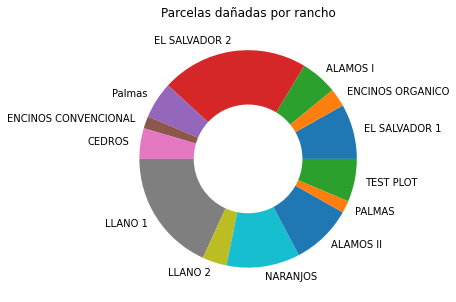

In [66]:
ranch_df = jitomates_df['RANCHO']
ranchs = {x for x in ranch_df}
damage_df = jitomates_df[jitomates_df['Severidad del Problema'] == "Daño"]
ranch_parc_df = damage_df[['RANCHO', 'PARCELA']]
ranch_parc = dict()

for ranch in ranchs:
    ranch_df = ranch_parc_df[ranch_parc_df['RANCHO']==ranch]
    parcelas = {x for x in ranch_df['PARCELA']}
    ranch_parc[ranch] = len(parcelas)

x = []
labels = []

for ranch in ranch_parc:
    x.append(ranch_parc[ranch])
    labels.append(ranch)

f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.pie(x, labels=labels,  wedgeprops=dict(width=.5))
ax.set_title("Parcelas dañadas por rancho")
plt.show()



In [67]:
cols2drop = []
ignore_cols = ['Severidad del Problema']

for row in jitomates_df:
    if jitomates_df[row].dtype == "object" and row not in ignore_cols:
        cols2drop.append(row)

clean_df = jitomates_df.drop(cols2drop, 1)
cols2drop.clear()

for column in clean_df.columns:
    column_data = clean_df[column]
    isna_cd = column_data.isna()
    if isna_cd.describe()["top"]:
        cols2drop.append(column)
    else:
        clean_df[column] = clean_df[column].fillna(0)

clean_df = clean_df.drop(cols2drop, 1)


In [68]:
daño_df = clean_df.loc[jitomates_df['Severidad del Problema'] == "Daño"]
controle_df = clean_df.loc[jitomates_df['Severidad del Problema'] == "Controle"]
equilibrio_df = clean_df.loc[jitomates_df['Severidad del Problema'] == "Equilibrio"]

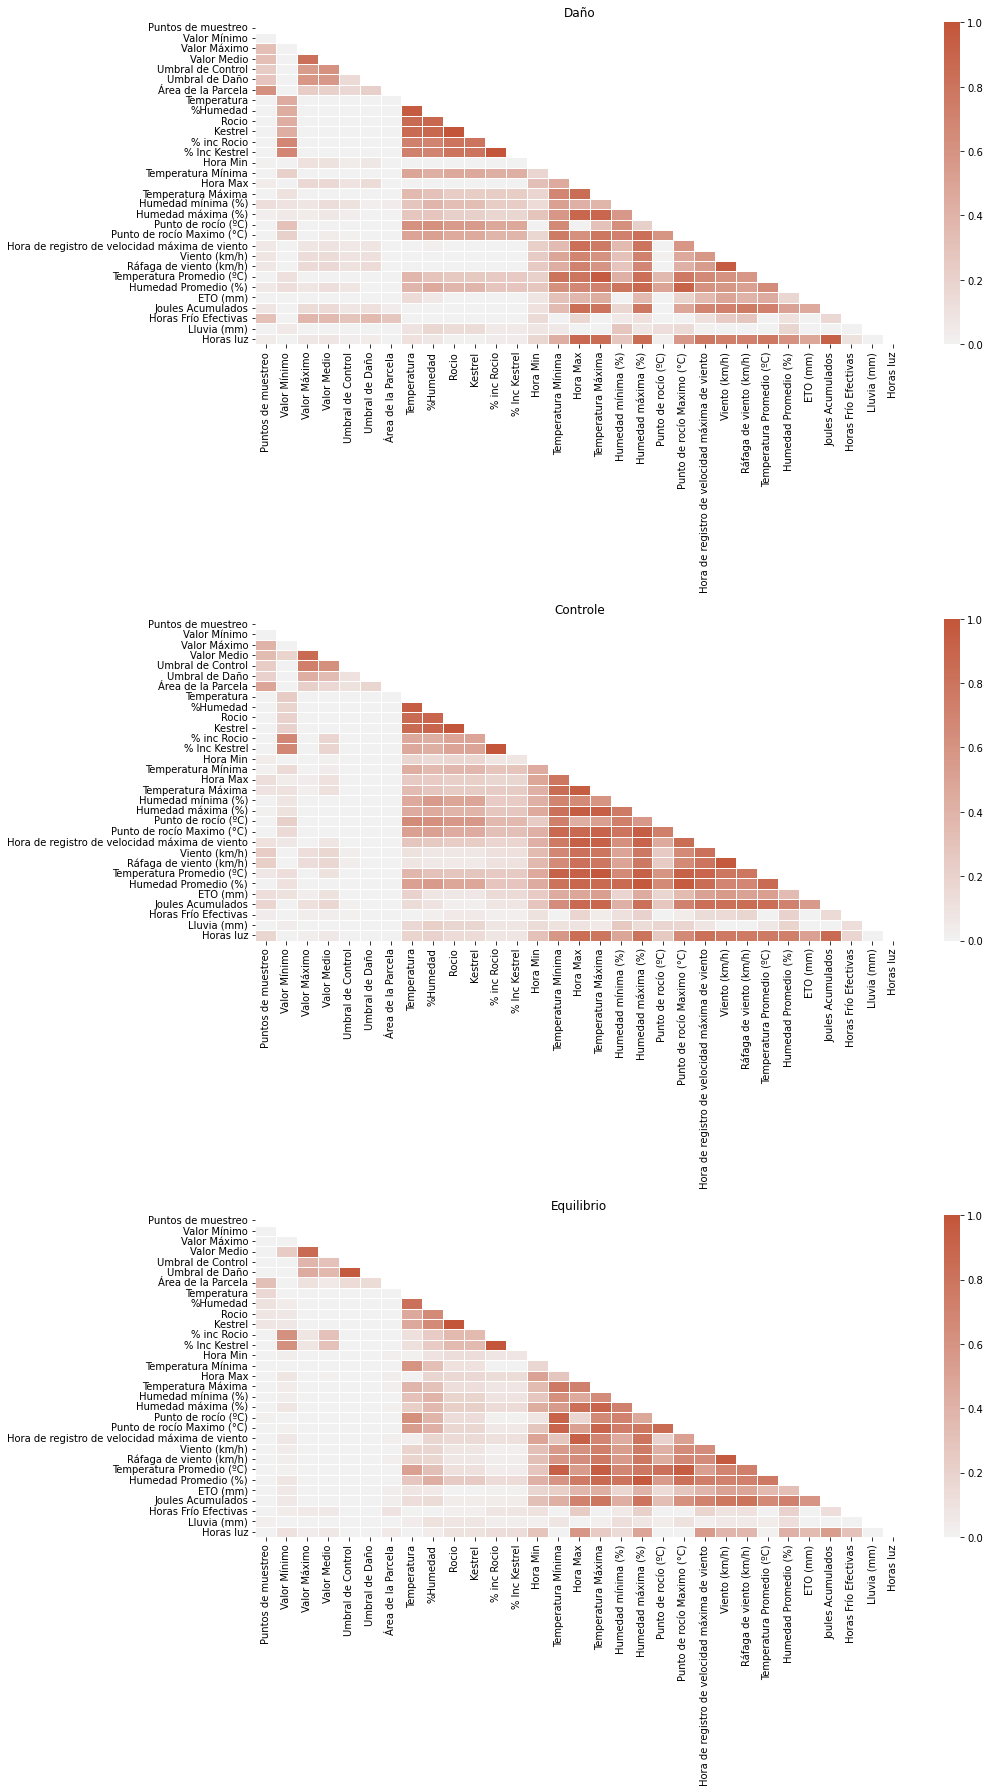

In [69]:
# Set up the matplotlib figure
f, ax = plt.subplots(3, 1, figsize=(15, 25))

daño_df_corr = daño_df.corr()
controle_df_corr = controle_df.corr()
equilibrio_df_corr = equilibrio_df.corr()

# Generate a mask for the upper triangle
mask_daño = np.triu(np.ones_like(daño_df_corr, dtype=bool))
mask_controle = np.triu(np.ones_like(controle_df_corr, dtype=bool))
mask_equilibrio = np.triu(np.ones_like(equilibrio_df_corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(daño_df_corr, mask=mask_daño, cmap=cmap, vmax=1, vmin=0, center=0,
           square=False, linewidths=.5, cbar_kws={"shrink": 1}, ax=ax[0])
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(controle_df_corr, mask=mask_controle, cmap=cmap, vmax=1, vmin=0, center=0,
           square=False, linewidths=.5, cbar_kws={"shrink": 1}, ax=ax[1])
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(equilibrio_df_corr, mask=mask_equilibrio, cmap=cmap, vmax=1, vmin=0, center=0,
           square=False, linewidths=.5, cbar_kws={"shrink": 1}, ax=ax[2])

ax[0].set_title("Daño")
ax[1].set_title("Controle")
ax[2].set_title("Equilibrio")
f.tight_layout()    

In [70]:
clean_df.columns

Index(['Severidad del Problema', 'Puntos de muestreo', 'Valor Mínimo',
       'Valor Máximo', 'Valor Medio', 'Umbral de Control', 'Umbral de Daño',
       'Área de la Parcela', 'Temperatura', '%Humedad', 'Rocio', 'Kestrel',
       '% inc Rocio', '% Inc Kestrel', 'Hora Min', 'Temperatura Mínima',
       'Hora Max', 'Temperatura Máxima', 'Humedad mínima (%)',
       'Humedad máxima (%)', 'Punto de rocío (ºC)',
       'Punto de rocío Maximo (°C)',
       'Hora de registro de velocidad máxima de viento', 'Viento (km/h)',
       'Ráfaga de viento (km/h)', 'Temperatura Promedio (ºC)',
       'Humedad Promedio (%)', 'ETO (mm)', 'Joules Acumulados',
       'Horas Frío Efectivas', 'Lluvia (mm)', 'Horas luz'],
      dtype='object')

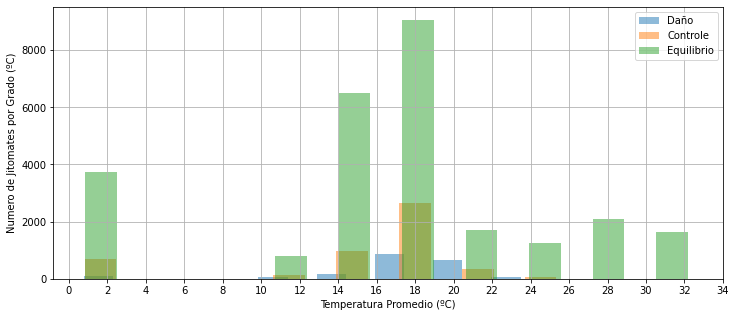

In [71]:
fig, ax = plt.subplots(figsize=(12, 5))

damage_temp = daño_df['Temperatura Promedio (ºC)']
contrl_temp = controle_df['Temperatura Promedio (ºC)']
equilb_temp = equilibrio_df['Temperatura Promedio (ºC)']

damage_temp.hist(alpha=0.5,rwidth=.5, ax=ax)
contrl_temp.hist(alpha=0.5,rwidth=.5, ax=ax)
equilb_temp.hist(alpha=0.5, rwidth=.5, ax=ax)

ax.legend(["Daño", "Controle", "Equilibrio"])
ax.set_xticks(np.arange(35, step=2))
ax.set_ylabel("Numero de Jitomates por Grado (ºC)")
ax.set_xlabel("Temperatura Promedio (ºC)")
plt.show()

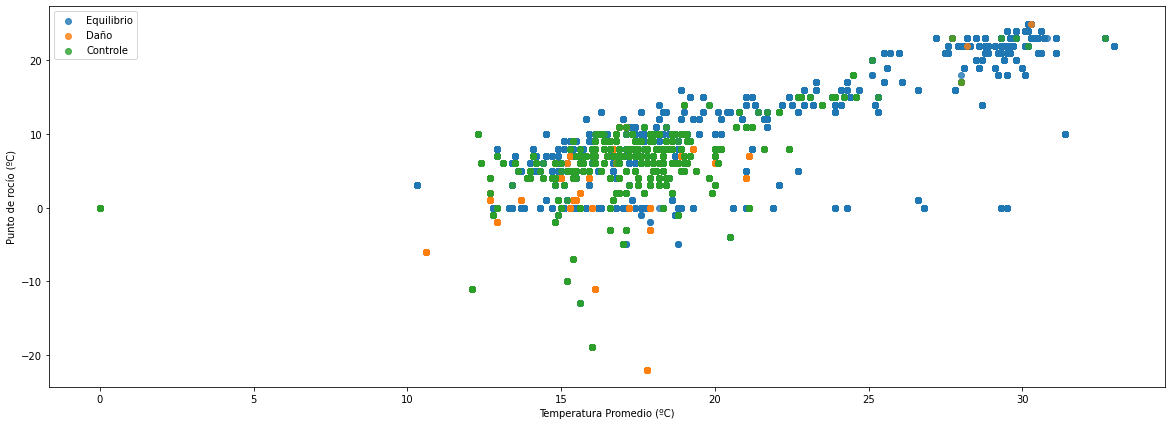

In [77]:
# Scatter entre punto de rocio y temperatura promedio

def df_scatter(df, ax, m, xl, yl):
    x = df[xl]
    y = df[yl]
    ax.scatter(x, y, alpha=.8, marker=m)

fig, ax = plt.subplots(figsize=(20, 7))
x_label = 'Temperatura Promedio (ºC)'
y_label = 'Punto de rocío (ºC)'
marker = 'o'

df_scatter(equilibrio_df, ax, marker, x_label, y_label)
df_scatter(daño_df, ax, marker, x_label, y_label)
df_scatter(controle_df, ax, marker, x_label, y_label)
ax.legend(["Equilibrio", "Daño", "Controle"])
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.show()

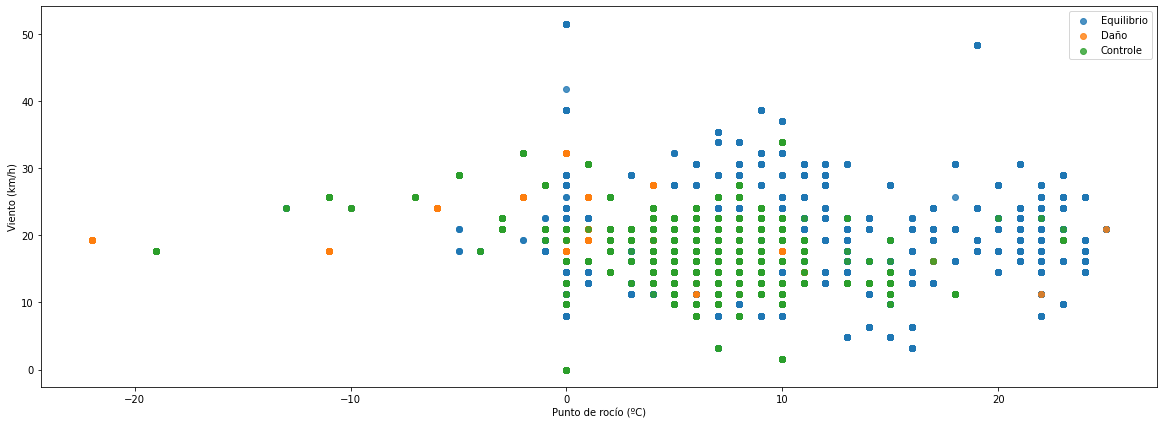

In [75]:
def df_scatter(df, ax, m, xl, yl):
    x = df[xl]
    y = df[yl]
    ax.scatter(x, y, alpha=.8, marker=m)

fig, ax = plt.subplots(figsize=(20, 7))
x_label = 'Punto de rocío (ºC)'
y_label = 'Viento (km/h)'
marker = 'o'

df_scatter(equilibrio_df, ax, marker, x_label, y_label)
df_scatter(daño_df, ax, marker, x_label, y_label)
df_scatter(controle_df, ax, marker, x_label, y_label)
ax.legend(["Equilibrio", "Daño", "Controle"])
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.show()